In [1]:
import pandas as pd

df = pd.read_csv('MemberActivity.csv')
df.head()

Age  gender occupation education lifestyle favorite        zone activity  \
0  34  female   employee  graduate    family   family    Watthana  cooking   
1  63  female   business  bachelor    family   travel    Yan Nawa  cooking   
2  37  female   employee  bachelor    family   travel    Watthana  cooking   
3  51  female   business  bachelor    family   family   Lat Phrao  cooking   
4  61  female   business  bachelor    family   family  Suan Luang  cooking   

   month                        place  
0      1  Cooking Studio Town in Town  
1      1  Cooking Studio Town in Town  
2      1  Cooking Studio Town in Town  
3      1  Cooking Studio Town in Town  
4      1  Cooking Studio Town in Town

In [2]:
df.shape

(4124, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         4124 non-null   object
 1   gender      4124 non-null   object
 2   occupation  4124 non-null   object
 3   education   4124 non-null   object
 4   lifestyle   4124 non-null   object
 5   favorite    4124 non-null   object
 6   zone        4124 non-null   object
 7   activity    4124 non-null   object
 8   month       4124 non-null   int64 
 9   place       4124 non-null   object
dtypes: int64(1), object(9)
memory usage: 322.3+ KB


In [4]:
df.isnull().sum()

Age           0
gender        0
occupation    0
education     0
lifestyle     0
favorite      0
zone          0
activity      0
month         0
place         0
dtype: int64

In [5]:
df['Age'].value_counts()

Age
51         137
48         135
47         133
49         133
52         131
          ... 
#VALUE!      1
145          1
-64          1
79           1
76           1
Name: count, Length: 80, dtype: int64

In [6]:
df['gender'].value_counts()

gender
female    2643
male      1481
Name: count, dtype: int64

In [7]:
df['occupation'].value_counts()

occupation
business      1354
employee      1287
other          420
student        374
official       254
housewife      161
enterprise     120
freelance      116
retire          29
unemployed       9
Name: count, dtype: int64

In [8]:
df['education'].value_counts()

education
bachelor        2039
graduate         720
secondary        584
other            323
diploma          244
primary          199
kindergarten      15
Name: count, dtype: int64

In [9]:
df['lifestyle'].value_counts()

lifestyle
family        1340
party         1009
simplicity     818
technology     490
other          276
workaholic     191
Name: count, dtype: int64

In [10]:
df['favorite'].value_counts()

favorite
travel       1842
concert       758
family        570
movie         476
other         254
rally          92
sport          89
celebrity      30
extreme        13
Name: count, dtype: int64

In [11]:
import numpy as np

# Convert 'Age' to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Calculate the median of the numeric 'Age' column
median_age = df['Age'].median()

# Impute NaN values with the median
df['Age'] = df['Age'].fillna(median_age)

# Check if there are any remaining null values
df['Age'].isnull().sum()

np.int64(0)

In [12]:
#df = df[df['Age'] <= 100]

In [13]:
df['Age'] = df['Age'].abs()

In [14]:
df['Age'].value_counts()

Age
51.0     137
48.0     135
47.0     133
49.0     133
52.0     131
        ... 
2.0        3
81.0       1
145.0      1
79.0       1
76.0       1
Name: count, Length: 78, dtype: int64

In [15]:
df['Age'].value_counts().sort_index()

Age
2.0       3
3.0       3
4.0      17
5.0       3
6.0       9
         ..
75.0      3
76.0      1
79.0      1
81.0      1
145.0     1
Name: count, Length: 78, dtype: int64

In [16]:
df.head()

Age  gender occupation education lifestyle favorite        zone activity  \
0  34.0  female   employee  graduate    family   family    Watthana  cooking   
1  63.0  female   business  bachelor    family   travel    Yan Nawa  cooking   
2  37.0  female   employee  bachelor    family   travel    Watthana  cooking   
3  51.0  female   business  bachelor    family   family   Lat Phrao  cooking   
4  61.0  female   business  bachelor    family   family  Suan Luang  cooking   

   month                        place  
0      1  Cooking Studio Town in Town  
1      1  Cooking Studio Town in Town  
2      1  Cooking Studio Town in Town  
3      1  Cooking Studio Town in Town  
4      1  Cooking Studio Town in Town

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef

# 1. โหลดข้อมูล
df_imputed = df.copy()

# 2. การกำหนด Features และ Preprocessing
TARGET_COLUMNS = ['lifestyle', 'favorite']
FEATURE_COLUMNS = ['Age', 'gender', 'occupation', 'education']

# One-Hot Encoding สำหรับ Feature ทั้งหมด (ยกเว้น Age ที่เป็นตัวเลขแล้ว)
cols_to_encode = [col for col in FEATURE_COLUMNS if col != 'Age']
df_encoded = pd.get_dummies(df_imputed, columns=cols_to_encode, drop_first=False)
print("--- 2. Data Preprocessing: One-Hot Encoding เสร็จสมบูรณ์ ---")
print("-" * 40)


# 3. Random Forest Imputation และ Metric Evaluation
print("--- 3. Random Forest Imputation & Evaluation เริ่มต้น ---")

for target in TARGET_COLUMNS:
    print(f"\n** กำลังดำเนินการสำหรับคอลัมน์: {target} **")

    # 3.1 แบ่งข้อมูลเป็นชุดฝึก (Known) และชุดทำนาย (Unknown)
    train_set = df_encoded[df_encoded[target] != 'other'].copy()
    predict_set = df_encoded[df_encoded[target] == 'other'].copy()

    if train_set.empty:
        print(f"  -> ไม่มีข้อมูลที่ระบุความสนใจใน {target} เพื่อฝึกสอน")
        continue

    # 3.2 การเลือก Features และ Target สำหรับการฝึก

    # เลือกคอลัมน์ Feature ทั้งหมดที่ถูก One-Hot Encoding แล้ว + Age
    X_train_cols = [col for col in train_set.columns if col not in TARGET_COLUMNS and col not in cols_to_encode]
    X_train_cols.append('Age')

    # กรองเอาเฉพาะคอลัมน์ที่อยู่ใน FEATURE_COLUMNS (หรือถูก encode มาจากมัน)
    final_features = [col for col in X_train_cols if any(c in col for c in FEATURE_COLUMNS)]

    X_train = train_set[final_features]
    Y_train = train_set[target]

    # 3.3 ฝึกโมเดล Random Forest Classifier
    # n_estimators=150: ใช้ Decision Trees 150 ต้น
    # class_weight='balanced': ปรับน้ำหนักของ Classes ที่ไม่สมดุล
    model = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, class_weight='balanced')
    model.fit(X_train, Y_train)

    # 3.4 **การประเมินประสิทธิภาพ (Evaluation on Training Set)**
    # ทำนายผลลัพธ์บนชุดฝึกสอน (Training Set)
    Y_train_pred = model.predict(X_train)

    print("  -> Metrics บนชุดข้อมูลฝึกสอน (Known Data):")
    print(f"     Accuracy Score:    {accuracy_score(Y_train, Y_train_pred):.4f}")
    print(f"     Cohen's Kappa:     {cohen_kappa_score(Y_train, Y_train_pred):.4f}")
    print(f"     Matthews Corrcoef: {matthews_corrcoef(Y_train, Y_train_pred):.4f}")


    # 3.5 ทำนายค่า 'other' และอัพเดต DataFrame
    if not predict_set.empty:
        X_predict = predict_set[final_features]
        Y_pred = model.predict(X_predict)

        # อัพเดต DataFrame หลัก (df_imputed)
        df_imputed.loc[predict_set.index, target] = Y_pred

        # 3.6 อัพเดต DataFrame ที่เข้ารหัส (df_encoded) สำหรับ Target ถัดไป
        if target == 'lifestyle':
            df_encoded.loc[predict_set.index, target] = Y_pred
            # ลบและสร้าง One-Hot Encoding ใหม่ของ lifestyle ที่เติมแล้ว
            df_encoded = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith('lifestyle_')], errors='ignore')
            df_encoded = pd.get_dummies(df_encoded, columns=[target], prefix=target, drop_first=False)
            FEATURE_COLUMNS.append('lifestyle')
        print(f"  -> ทำนายและแทนที่ค่า 'other' ใน {target} จำนวน {len(predict_set)} แถว")
    else:
        print(f"  -> ไม่มีค่า 'other' ในคอลัมน์ {target} ที่ต้องทำนาย")

print("-" * 40)
print("--- 4. ผลลัพธ์สุดท้าย ---")
print("สถานะสุดท้ายของ 'other' หลังการทำนาย:")
other_counts_final = df_imputed[TARGET_COLUMNS].apply(lambda x: (x == 'other').sum())
print(other_counts_final)
print("\nตัวอย่าง 5 แถวแรกของ DataFrame หลังการทำความสะอาดและเติมค่า:")
print(df_imputed.head())

--- 2. Data Preprocessing: One-Hot Encoding เสร็จสมบูรณ์ ---
----------------------------------------
--- 3. Random Forest Imputation & Evaluation เริ่มต้น ---

** กำลังดำเนินการสำหรับคอลัมน์: lifestyle **
  -> Metrics บนชุดข้อมูลฝึกสอน (Known Data):
     Accuracy Score:    0.6216
     Cohen's Kappa:     0.5113
     Matthews Corrcoef: 0.5164
  -> ทำนายและแทนที่ค่า 'other' ใน lifestyle จำนวน 276 แถว

** กำลังดำเนินการสำหรับคอลัมน์: favorite **
  -> Metrics บนชุดข้อมูลฝึกสอน (Known Data):
     Accuracy Score:    0.7744
     Cohen's Kappa:     0.6952
     Matthews Corrcoef: 0.7021
  -> ทำนายและแทนที่ค่า 'other' ใน favorite จำนวน 254 แถว
----------------------------------------
--- 4. ผลลัพธ์สุดท้าย ---
สถานะสุดท้ายของ 'other' หลังการทำนาย:
lifestyle    0
favorite     0
dtype: int64

ตัวอย่าง 5 แถวแรกของ DataFrame หลังการทำความสะอาดและเติมค่า:
    Age  gender occupation education lifestyle favorite        zone activity  \
0  34.0  female   employee  graduate    family   family    Watthana 

In [18]:
df_imputed = df_imputed.drop(['month','place','zone'], axis=1)
df_imputed.head()

Age  gender occupation education lifestyle favorite activity
0  34.0  female   employee  graduate    family   family  cooking
1  63.0  female   business  bachelor    family   travel  cooking
2  37.0  female   employee  bachelor    family   travel  cooking
3  51.0  female   business  bachelor    family   family  cooking
4  61.0  female   business  bachelor    family   family  cooking

In [19]:
cols =  ['gender','occupation', 'education','lifestyle','favorite']

In [20]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the selected columns
encoded_cols = encoder.fit_transform(df_imputed[cols])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cols))

# Drop the original columns and concatenate the encoded columns
df_imputed = df_imputed.drop(cols, axis=1)
df_imputed = pd.concat([df_imputed, encoded_df], axis=1)

df_imputed.head()

Age activity  gender_female  gender_male  occupation_business  \
0  34.0  cooking            1.0          0.0                  0.0   
1  63.0  cooking            1.0          0.0                  1.0   
2  37.0  cooking            1.0          0.0                  0.0   
3  51.0  cooking            1.0          0.0                  1.0   
4  61.0  cooking            1.0          0.0                  1.0   

   occupation_employee  occupation_enterprise  occupation_freelance  \
0                  1.0                    0.0                   0.0   
1                  0.0                    0.0                   0.0   
2                  1.0                    0.0                   0.0   
3                  0.0                    0.0                   0.0   
4                  0.0                    0.0                   0.0   

   occupation_housewife  occupation_official  ...  lifestyle_technology  \
0                   0.0                  0.0  ...                   0.0   
1                   0.0                  0.0  ...                   0.0   
2                   0.0                  0.0  ...                   0.0   
3                   0.0                  0.0  ...                   0.0   
4                   0.0                  0.0  ...                   0.0   

   lifestyle_workaholic  favorite_celebrity  favorite_concert  \
0                   0.0                 0.0               0.0   
1                   0.0                 0.0               0.0   
2                   0.0                 0.0               0.0   
3                   0.0                 0.0               0.0   
4                   0.0                 0.0               0.0   

   favorite_extreme  favorite_family  favorite_movie  favorite_rally  \
0               0.0              1.0             0.0             0.0   
1               0.0              0.0             0.0             0.0   
2               0.0              0.0             0.0             0.0   
3               0.0              1.0             0.0             0.0   
4               0.0              1.0             0.0             0.0   

   favorite_sport  favorite_travel  
0             0.0              0.0  
1             0.0              1.0  
2             0.0              1.0  
3             0.0              0.0  
4             0.0              0.0  

[5 rows x 34 columns]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df_imputed.drop('activity', axis=1)
y = df_imputed['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

X_test

Age  gender_female  gender_male  occupation_business  \
3837  31.0            0.0          1.0                  1.0   
1622  58.0            0.0          1.0                  0.0   
2717  56.0            0.0          1.0                  0.0   
1353  50.0            1.0          0.0                  0.0   
1128  50.0            0.0          1.0                  0.0   
...    ...            ...          ...                  ...   
3843  48.0            0.0          1.0                  0.0   
3471  33.0            1.0          0.0                  0.0   
626   42.0            1.0          0.0                  0.0   
3019  59.0            1.0          0.0                  1.0   
2570  40.0            0.0          1.0                  0.0   

      occupation_employee  occupation_enterprise  occupation_freelance  \
3837                  0.0                    0.0                   0.0   
1622                  0.0                    0.0                   0.0   
2717                  1.0                    0.0                   0.0   
1353                  0.0                    0.0                   0.0   
1128                  1.0                    0.0                   0.0   
...                   ...                    ...                   ...   
3843                  0.0                    0.0                   0.0   
3471                  1.0                    0.0                   0.0   
626                   0.0                    1.0                   0.0   
3019                  0.0                    0.0                   0.0   
2570                  0.0                    0.0                   0.0   

      occupation_housewife  occupation_official  occupation_other  ...  \
3837                   0.0                  0.0               0.0  ...   
1622                   0.0                  1.0               0.0  ...   
2717                   0.0                  0.0               0.0  ...   
1353                   1.0                  0.0               0.0  ...   
1128                   0.0                  0.0               0.0  ...   
...                    ...                  ...               ...  ...   
3843                   0.0                  1.0               0.0  ...   
3471                   0.0                  0.0               0.0  ...   
626                    0.0                  0.0               0.0  ...   
3019                   0.0                  0.0               0.0  ...   
2570                   0.0                  1.0               0.0  ...   

      lifestyle_technology  lifestyle_workaholic  favorite_celebrity  \
3837                   0.0                   1.0                 0.0   
1622                   0.0                   0.0                 0.0   
2717                   0.0                   0.0                 0.0   
1353                   0.0                   0.0                 0.0   
1128                   0.0                   0.0                 0.0   
...                    ...                   ...                 ...   
3843                   0.0                   1.0                 0.0   
3471                   1.0                   0.0                 0.0   
626                    0.0                   0.0                 0.0   
3019                   0.0                   0.0                 0.0   
2570                   0.0                   0.0                 0.0   

      favorite_concert  favorite_extreme  favorite_family  favorite_movie  \
3837               1.0               0.0              0.0             0.0   
1622               0.0               0.0              1.0             0.0   
2717               0.0               0.0              0.0             0.0   
1353               1.0               0.0              0.0             0.0   
1128               0.0               0.0              1.0             0.0   
...                ...               ...              ...             ...   
3843               0.0               0.0              0.0           

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [24]:
# สร้าง tree เปล่า
classifier = DecisionTreeClassifier(random_state=571)

In [25]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=571)

In [26]:
classifier.get_depth()

28

In [27]:
import matplotlib.pyplot as plt

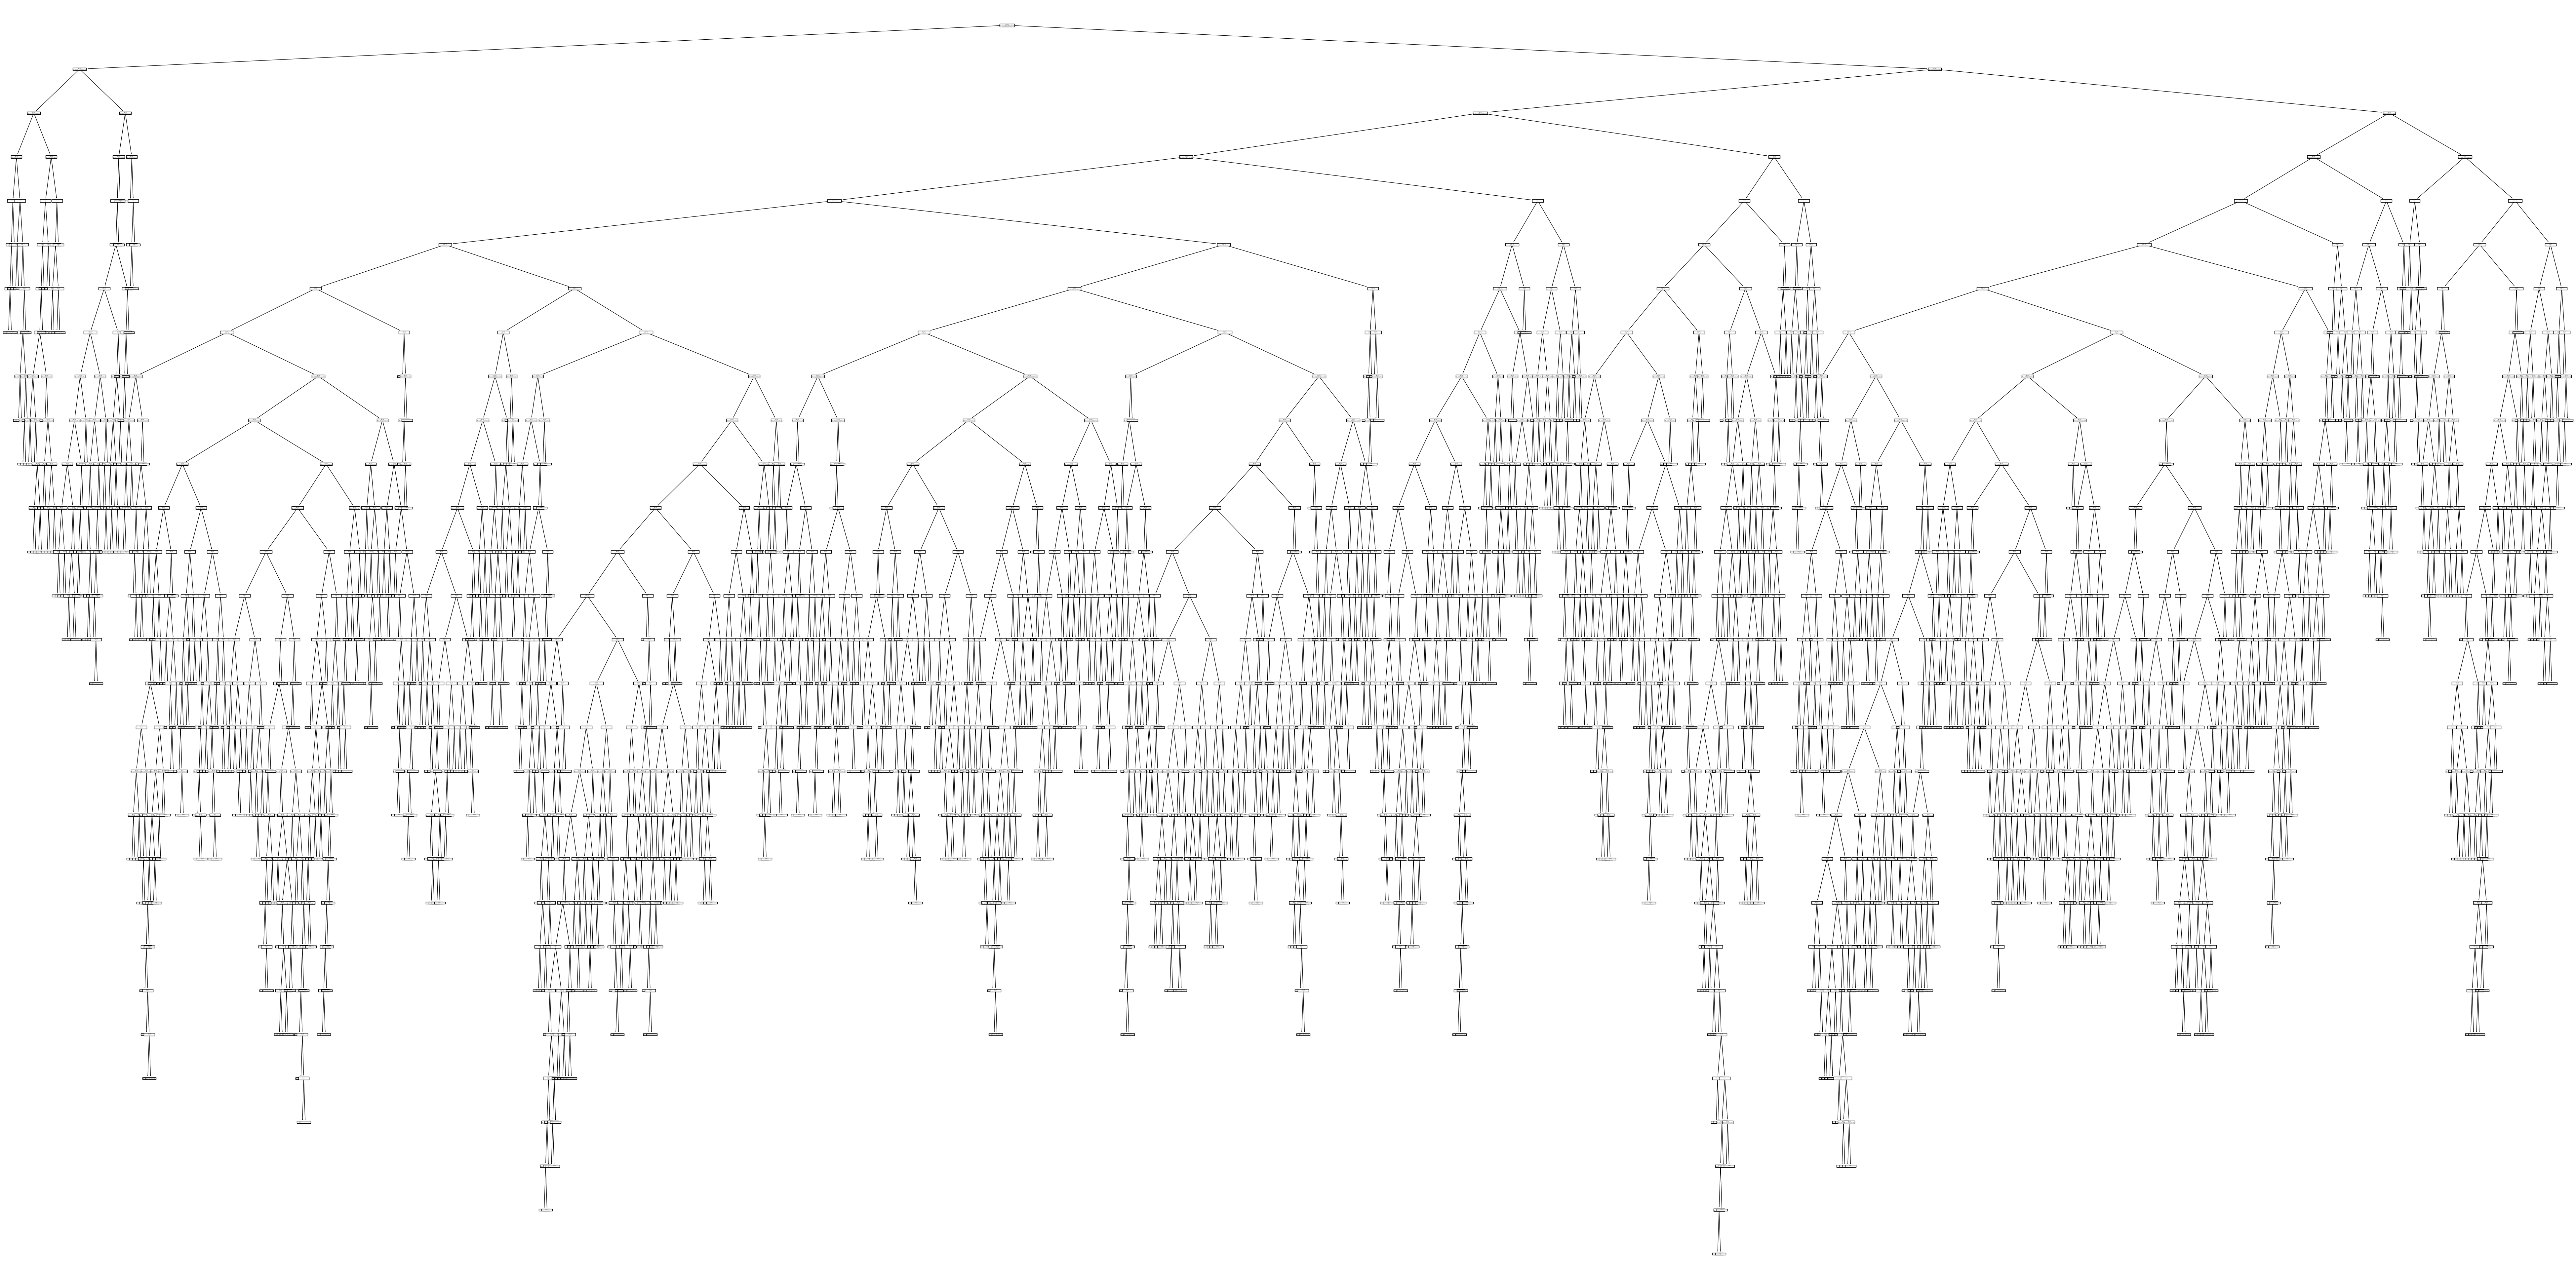

In [28]:
plt.figure(figsize=(100, 50))
plot_tree(classifier)
plt.show()

In [29]:
y_predict = classifier.predict(X_test)
y_predict

array(['movie', 'concert', 'movie', 'concert ', 'movie', 'stageplay',
       'culture', 'concert', 'stand up comedy', 'movie', 'movie',
       'healty ', 'stand up comedy', 'concert', 'stand up comedy',
       'movie', 'journey', 'movie', 'movie', 'concert', 'movie',
       'journey', 'journey', 'culture', 'journey', 'journey',
       'stand up comedy', 'movie', 'culture', 'journey', 'journey',
       'journey', 'stageplay', 'stageplay', 'movie', 'culture', 'movie',
       'movie', 'stand up comedy', 'stand up comedy', 'movie', 'journey',
       'journey', 'movie', 'concert', 'concert', 'concert',
       'stand up comedy', 'concert', 'journey', 'stageplay', 'journey',
       'concert', 'journey', 'stand up comedy', 'concert', 'movie',
       'movie', 'culture', 'stageplay', 'stand up comedy', 'concert',
       'concert', 'journey', 'stand up comedy', 'journey', 'movie',
       'stageplay', 'cooking', 'concert', 'nature', 'stageplay', 'movie',
       'journey', 'movie', 'movie', 'stand 

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

         beauty       0.00      0.00      0.00         8
        camping       0.41      0.56      0.47        16
        concert       0.08      0.13      0.10        85
       concert        0.44      0.58      0.50        26
        cooking       0.00      0.00      0.00         3
        culture       0.16      0.24      0.19        29
        gourmet       0.00      0.00      0.00         0
         healty       0.00      0.00      0.00         8
        healty        0.00      0.00      0.00        17
        journey       0.14      0.15      0.15       128
          movie       0.26      0.24      0.25       206
         nature       0.05      0.06      0.05        17
          photo       0.00      0.00      0.00         2
      stageplay       0.16      0.10      0.12       100
stand up comedy       0.23      0.18      0.20       180

       accuracy                           0.19       825
      macro avg       0.13   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
from sklearn.metrics import accuracy_score
for d in range(2,28):
  cl = DecisionTreeClassifier(random_state=571, max_depth=d)
  cl.fit(X_train, y_train)
  y_tmp = cl.predict(X_test)
  print(d, accuracy_score(y_test, y_tmp))

2 0.24
3 0.2387878787878788
4 0.2509090909090909
5 0.24606060606060606
6 0.2593939393939394
7 0.26545454545454544
8 0.2606060606060606
9 0.2545454545454545
10 0.23757575757575758
11 0.23272727272727273
12 0.22424242424242424
13 0.2193939393939394
14 0.19757575757575757
15 0.2193939393939394
16 0.21818181818181817
17 0.2
18 0.2
19 0.18666666666666668
20 0.1987878787878788
21 0.18424242424242424
22 0.18545454545454546
23 0.18787878787878787
24 0.18545454545454546
25 0.18303030303030304
26 0.1890909090909091
27 0.18303030303030304


In [32]:
classifier7 = DecisionTreeClassifier(random_state=571, max_depth=7)
classifier7.fit(X_train, y_train)
y_predict7 = classifier7.predict(X_test)
print(classification_report(y_test, y_predict7))

                 precision    recall  f1-score   support

         beauty       0.00      0.00      0.00         8
        camping       0.40      0.88      0.55        16
        concert       0.00      0.00      0.00        85
       concert        0.50      0.08      0.13        26
        cooking       0.00      0.00      0.00         3
        culture       0.00      0.00      0.00        29
         healty       0.00      0.00      0.00         8
        healty        0.00      0.00      0.00        17
        journey       0.27      0.14      0.19       128
          movie       0.28      0.53      0.37       206
         nature       0.00      0.00      0.00        17
          photo       0.00      0.00      0.00         2
      stageplay       0.29      0.02      0.04       100
stand up comedy       0.24      0.41      0.30       180

       accuracy                           0.27       825
      macro avg       0.14      0.15      0.11       825
   weighted avg       0.22   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


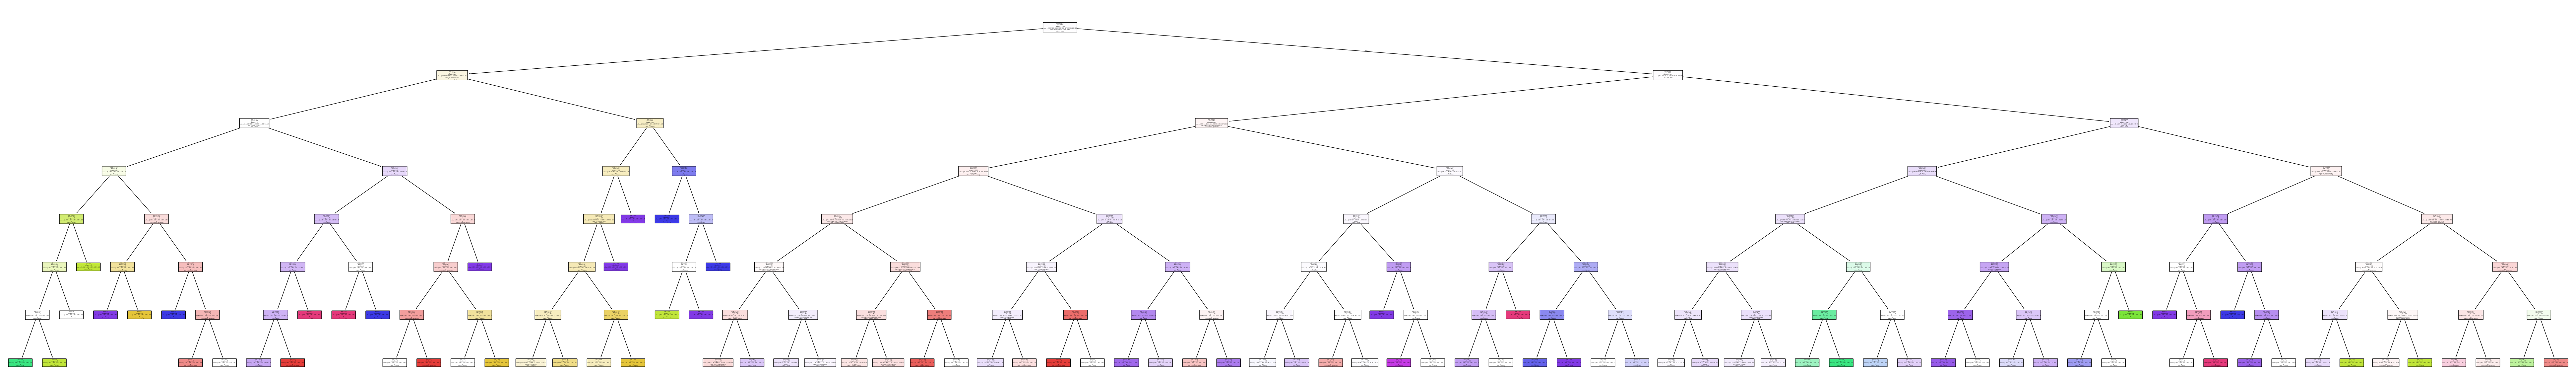

In [33]:
plt.figure(figsize=(100, 15))
plot_tree(classifier7, class_names=classifier7.classes_, filled=True, rounded=True)
plt.show()

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict7)

0.26545454545454544

In [35]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_predict7)

np.float64(0.06363253265908109)

In [36]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predict7)

np.float64(0.0688492612982371)